In [1]:
import urllib3
urllib3.disable_warnings()

from local_lib.misc import custom_markdown_style
custom_markdown_style()

# Partie 1

Un logiciel informatique dépend en général d'un certain nombre de librairies "open-source".

On cherche à connaître l'ensemble des librairies dont un projet dépend, sachant que chaque librairie dépend à son tour d'un certain nombre d'autres librairies.

<div style="float: middle">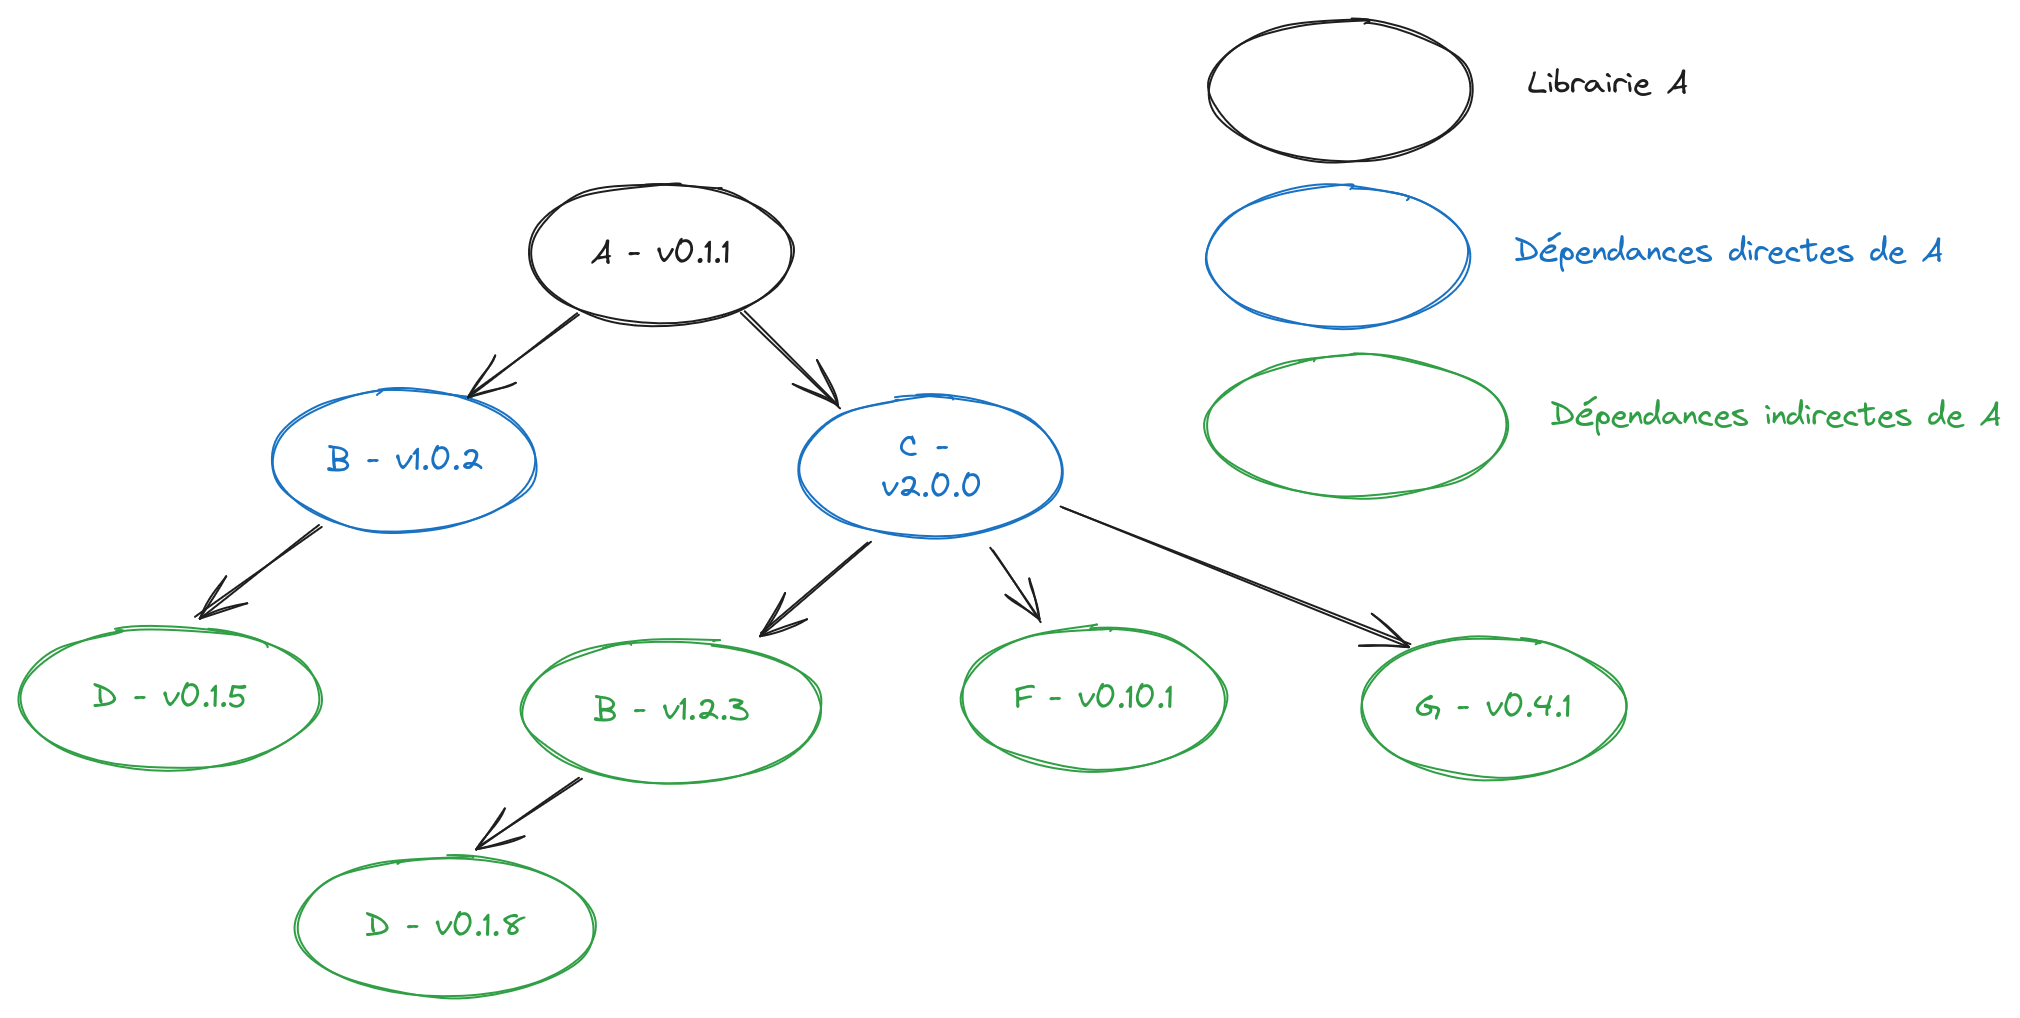</div>

Afin de simuler l'existence d'un dépot de librairies, on pourra supposer avoir une fonction `fetch_dependencies` qui permet d'obtenir les dépendances directes de chaque librairie.

```python
fetch_dependencies(name: str, version: str) -> list[tuple[str, str]]:
```

Exemple:

```python
>>> fetch_dependencies(name="A", version="v0.1.1")
[ 
 ("B", "v1.0.2"),
 ("C", "v2.0.0"),
]
```

<div style="border: 1px solid black; padding: 5px"> 
    <h2>Exercice 1</h2>
Écrire une fonction qui, étant donné une librairie, retourne l'ensemble des ses dépendances (directes et indirectes).
</div>



In [14]:
import requests
def get_direct_deps(name, version):
    data = requests.get(f"https://sapristi.github.io/data/deps/{name}/{version}.json").json()
    return { (v["name"], v["version"]) for v in data["dependencies"]}

def get_all_deps(name, version):
    result = set()
    to_fetch = [(name, version)]
    while len(to_fetch) > 0:
        first_to_fetch = to_fetch.pop(0)
        deps = get_direct_deps(first_to_fetch[0], first_to_fetch[1])
        for name_version in deps:
            if name_version in result or name_version in to_fetch:
                continue
            result.add(name_version)
            to_fetch.append(name_version)
    return result

In [25]:
def get_all_deps_rec(name, version):
    result = []
    deps = get_direct_deps(name, version)
    result.extend(deps)
    for dep_name, dep_version in deps:
        dep_result = get_all_deps_rec(dep_name, dep_version)
        result.extend(dep_result)
    return result

In [26]:
get_direct_deps("R", "v0.0.2")

{('F', 'v2.2.1'),
 ('L', 'v0.1.2'),
 ('N', 'v1.1.0'),
 ('X', 'v2.2.1'),
 ('Y', 'v1.0.0')}

In [27]:
get_all_deps("R", "v0.0.2")

{('C', 'v0.1.2'),
 ('C', 'v0.4.1'),
 ('F', 'v2.2.1'),
 ('L', 'v0.1.2'),
 ('N', 'v1.1.0'),
 ('O', 'v1.3.1'),
 ('P', 'v2.4.1'),
 ('Q', 'v1.3.1'),
 ('Q', 'v2.0.2'),
 ('S', 'v2.4.0'),
 ('V', 'v0.1.2'),
 ('V', 'v1.1.2'),
 ('X', 'v2.2.1'),
 ('Y', 'v1.0.0'),
 ('Z', 'v2.3.1')}

In [29]:
set(get_all_deps_rec("R", "v0.0.2"))

{('C', 'v0.1.2'),
 ('C', 'v0.4.1'),
 ('F', 'v2.2.1'),
 ('L', 'v0.1.2'),
 ('N', 'v1.1.0'),
 ('O', 'v1.3.1'),
 ('P', 'v2.4.1'),
 ('Q', 'v1.3.1'),
 ('Q', 'v2.0.2'),
 ('S', 'v2.4.0'),
 ('V', 'v0.1.2'),
 ('V', 'v1.1.2'),
 ('X', 'v2.2.1'),
 ('Y', 'v1.0.0'),
 ('Z', 'v2.3.1')}

# Partie 2

Dans certains langages (tels qu'en python), on ne peut installer qu'un unique version de chaque librairie. On souhaite donc développer un algorithme qui permette de ne garder qu'une seule version de chaque libraire voulue.

<div style="float: middle">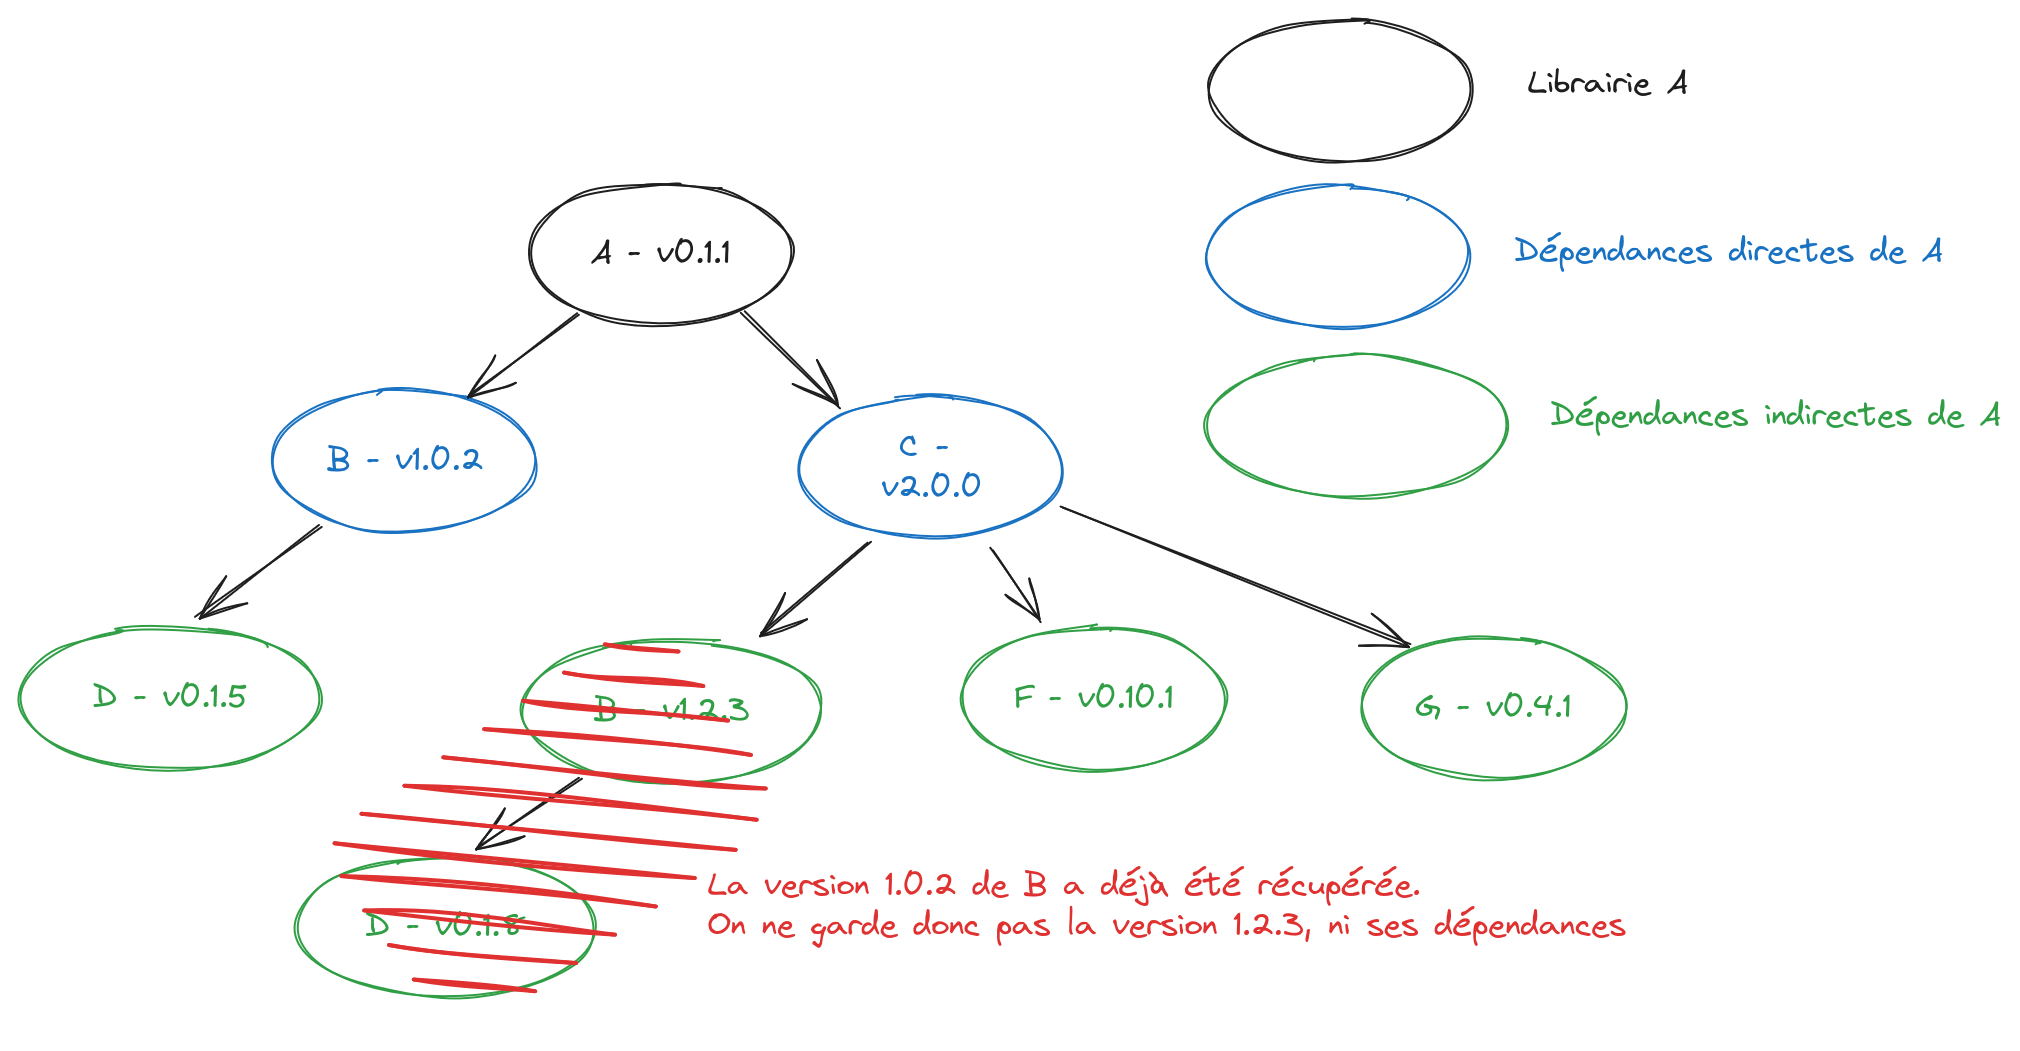</div>


<div style="border: 1px solid black; padding: 5px"> 
    <h2>Exercice 2</h2>
Écrire une fonction qui, étant donné  une librairie, retourne l'ensemble des ses dépendances (directes et indirectes), en ne gardant qu'une version par librairie.


**Note:** il existe plusieurs solutions possibles. Sur l'exemple précédent, on aurait pu garder la version `1.2.3` de `B` (ainsi que ses dépendances) au lieu de la `1.0.2`

</div>


In [21]:
def get_deps_single(name, version):
    result = {}
    to_fetch = [(name, version)]
    while len(to_fetch) > 0:
        name_to_fetch, version_to_fetch = to_fetch.pop(0)
        deps = get_direct_deps(name_to_fetch, version_to_fetch)
        for name, version in deps:
            if name in result or (name, version) in to_fetch:
                continue
            result[name] = version
            to_fetch.append((name, version))
    return result

In [22]:
get_deps_single("R", "v0.0.2")

{'X': 'v2.2.1',
 'Y': 'v1.0.0',
 'F': 'v2.2.1',
 'N': 'v1.1.0',
 'L': 'v0.1.2',
 'C': 'v0.4.1',
 'Z': 'v2.3.1',
 'S': 'v2.4.0',
 'Q': 'v2.0.2',
 'V': 'v0.1.2',
 'O': 'v1.3.1',
 'P': 'v2.4.1'}

# Annexe

Afin de faire cet exercice, on pourra s'aider d'une API listant les dépendances de chaque package.

Pour un package et une version données, on pourra accéder à la liste des dépendances à l'url `https://sapristi.github.io/data/deps/<Package>/<Version>.json`. Par exemple, https://sapristi.github.io/data/deps/A/v0.0.2.json pour la version `v0.0.2` du package `A`.

Afin de récupérer ces données en python, on pourra utiliser la librairie `requests`:


In [6]:
import requests

requests.get("https://sapristi.github.io/data/deps/A/v0.0.2.json").json()

{'name': 'A',
 'version': 'v0.0.2',
 'dependencies': [{'name': 'J', 'version': 'v0.2.0'}]}

On pourra prendre les libraires suivantes comme valeurs de départs des exercices qui suivent:
- librarie `C`, version `v0.4.1`
- librairie `A`, version `v0.0.2`
- librairie `R`, version `v0.0.2`